# Enunciado

Neste case, você deverá aplicar a regressão linear simples para estimar o limite de crédito de clientes de um banco, a partir do score deles no Serasa. O seu dataset (disponível no link abaixo) contém duas colunas: Score e Limit. Aplique a regressão linear, utilizando o LinearRegression do sklearn e, também, o OLS do statsmodels.

[Link do dataframe](https://s3-sa-east-1.amazonaws.com/lcpi/7c85cb96-165c-49a6-90f6-e35575a4dafe.csv)

In [16]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

dataframe = pd.read_csv('https://s3-sa-east-1.amazonaws.com/lcpi/7c85cb96-165c-49a6-90f6-e35575a4dafe.csv')

lr = LinearRegression()

X = dataframe[['Score']]

y = dataframe['Limit']

lr.fit(X, y)

y_est = lr.coef_[0] * X + lr.intercept_

y_pred = lr.predict(X)

print('Limite estimado com Sklearn:')

print(y_pred)

x = sm.add_constant(X)

model = sm.OLS(y, x).fit()

print('Limite estimado com Statsmodels:')

print(model.summary())

Limite estimado com Sklearn:
[ 3665.73658403  6640.05800736  7101.07782798  9584.63621646
  4766.23551066  7919.01621939  3308.81801323  7071.33461374
  3412.91926304  6759.03086429  8216.44836173  1509.35355211
  5316.48497398  7056.46300663  3457.53408439  2431.39319334
  3710.35140538  4498.54658256  6119.55175828  6580.57157889
  2951.89944243  6268.26782944  2624.72408586  5375.97140244
  1777.04248021  4305.21569004  3754.96622673  4409.31693986
 13570.22692372  5569.30229496  5599.04550919  2580.10926451
  7829.78657669  1866.27212291  2416.52158623  2728.82533568
  6223.65300809  6327.75425791  3918.55390501  3383.17604881
  3219.58837053  7457.99639878  4677.00586796  6074.93693693
  6431.85550773  7844.65818381  5048.79604588  4215.98604734
  2505.75122893  4721.62068931  5048.79604588  3933.42551213
  5316.48497398  5599.04550919  1509.35355211  1747.29926598
  4989.30961741  4914.95158183  3635.99336979  5256.99854551
  4870.33676048  3234.45997764  1836.52890868  3189.8451

C:\Users\lucas\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [17]:
model.resid.mean()

-1.4495071809506043e-13

<AxesSubplot:ylabel='Count'>

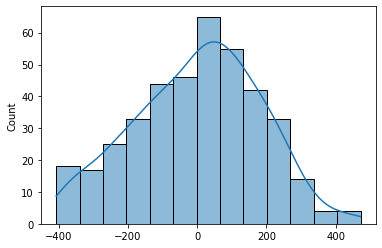

In [19]:
import seaborn as sns

sns.histplot(model.resid, kde=True)